# Unit Testing - The Secret to  ~~becoming depressed~~ writing code faster!

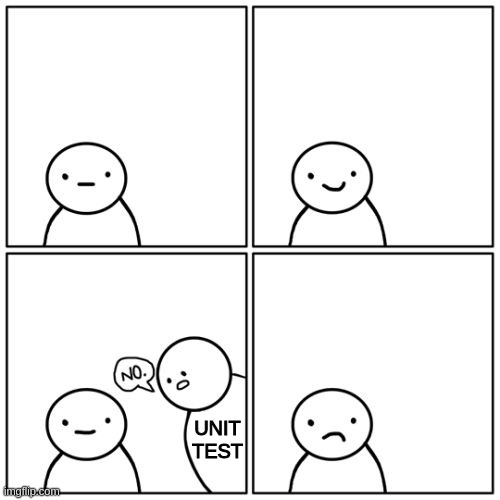

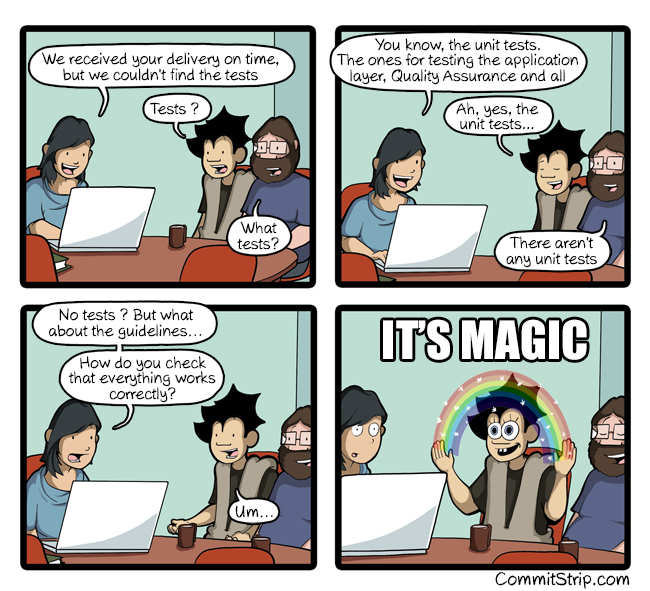

## The secret to become depressed 

"Happy Path" - The happy path is the way the developer intends the code to be used.
When writing for the Happy Path the developer does not condider all the different scenarios and outcomes that could happen.

Unit Testing ensures that a developer never has a Happy Path. 

Unit Testing like the name implies tests the most pasic level of each code or each individual unit of code. 

Idealy this is a method in isolation.

Testing this way gives you confidence that each part of the application behaves as expected. 

The smaller the method the easyer it is to test 

Unit Testing forces the developer to create code that is natraly cleaner (following the smaller is better thinking)

This type of programing is call Test Driven Development (TTD)

### Something simple

In [ ]:
#1
class Calculator(object):
    def add(self,x,y):
        return x + y


### But First -  Naming conventions

- Test name should express a specific requirement
- Test name could include the expected input or state and the expected result for that input or state
- Test name should be presented as a statement or fact of life that expresses workflows and outputs
- Test name could include the name of the tested method or class


   #### MethodName_StateUnderTest_ExpectedBehavior
    cons: should be renamed if method change name
    example: isAdult_AgeLessThan18_False
  #### MethodName_ExpectedBehavior_StateUnderTest
    cons: should be renamed if method change name
    example: isAdult_False_AgeLessThan18
   #### testFeatureBeingTested
    cons: “test” prefix is redundant
    example: testIsNotAnAdultIfAgeLessThan18
   #### FeatureToBeTested
    cons: no clue what result is expected from name
    example: IsNotAnAdultIfAgeLessThan18
   #### Should_ExpectedBehavior_When_StateUnderTest
    cons: duplicates `should` and `when`, long name
    example: Should_ThrowException_When_AgeLessThan18
   #### When_StateUnderTest_Expect_ExpectedBehavior
    cons: duplicates `when` and `expect`
    example: When_AgeLessThan18_Expect_isAdultAsFalse

In [ ]:
import unittest
help(unittest)

In [ ]:
#unit test in Jupyter/ipkernel
import unittest

class TestCalculate(unittest.TestCase):
    
    def test_add_method_returns_correct_result(self): #1
         self.assertEqual(4, Calculator().add(2,2))

    def test_add_method_returns_string(self):#3
       self.assertEqual("HelloWorld",Calculator().add("Hello","World"))

#    def test_add_method_unit_failure(self): #2
#        self.assertEqual(5, Calculator().add(2,2))

if __name__ == '__main__':
    #this will not run due to unittest looking for 
    #sys.argv which is used in jupyter app under test
    #unittest.main() 
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    

In [ ]:
#run the test outside of Jupyter/ipkernel 
%run calculate_test.py

# import unittest
# from calculate import Calculator

# class TestCalculate(unittest.TestCase):
#     def setUp(self):
#         self.calc = Calculator()
    
#     def test_add_method_returns_correct_result(self):
#         self.assertEqual(4, self.calc.add(2,2))

# if __name__=='__main__':
#     unittest.main()



## Exception Handling

Lets say you want to ensure that only numbers are used in the add function
first we need to modify the code a little:

In [ ]:
class Calculator():
    def add(self,x,y):
        if type(x&y) == int:
            return x + y
        else:
            raise TypeError("Invalid type: {} and {}".format(type(x),type(y)))

In [ ]:
class TestCalculate(unittest.TestCase):
   
    def test_add_method_raises_typeerror(self):#
        print("hello")
        self.assertRaises(TypeError,Calculator().add, 1, 2) #error
        print("goodbye")
        #testing Both
        self.assertRaises(TypeError,Calculator().add, "Hello", "World")
        # testing x
        self.assertRaises(TypeError,Calculator().add, int("1"), "World")
        self.assertRaises(TypeError,Calculator().add, 1, "World")
        #testing Y 
        self.assertRaises(TypeError,Calculator().add, "World", int("1") )
        self.assertRaises(TypeError,Calculator().add, "World", 0)


In [ ]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Now lets do something that is unconventional and try and send an AttibuteError

In [ ]:
Calculator.add([].get)

In [ ]:
 class TestCalculate(unittest.TestCase):
    def test_assert_raises(self): #notice that we get an error when exspecting to pass
 #        self.assertRaises(AttributeError,Calculator().add([].get))
        with self.assertRaises(AttributeError):
           # [].get
            Calculator().add([].get)

In [ ]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Lets clean up the code to see it all in one test.

In [ ]:
#lets put them all together to make a full unit test

class TestCalculate(unittest.TestCase):
    
    def test_add_method_returns_correct_result(self): #1
        self.assertEqual(4, Calculator().add(2,2))
        
    def test_add_method_raises_typeerror(self):#
        self.assertRaises(TypeError,Calculator().add, "Hello", "World")
        self.assertRaises(TypeError,Calculator().add, 1, "2") 
        self.assertRaises(TypeError,Calculator().add, "1", 2) 
        self.assertRaises(TypeError,Calculator().add, {1}, 2) 
        self.assertRaises(TypeError,Calculator().add, 1, 2) 
        
    def test_assert_raises(self):
        with self.assertRaises(AttributeError):
            Calculator().add([].get)
            
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

## If you are forced to be depressed then be lazy
### setUp
Because Unit testing is very repetitive setup can help to create instances and run multiple tests ensuring the code is DRY (dont repeat yourself)

Lets assume the class name changes from Calculator to Calculate. You would need to change all the insances insteded us a setup

In [ ]:
class Calculate():
    def add(self,x,y):
        if type(x) == int:
            return x + y 
        else:
            raise TypeError("Invalid type: {} and {}".format(type(x),type(y)))

In [ ]:
[1]+[1]

In [ ]:
class TestCalculate(unittest.TestCase):
    def setUp(self):
        self.calc = Calculate()
    
    def test_add_method_returns_correct_result(self): #1
        self.assertEqual(4, self.calc.add(2,2))
        
    def test_add_method_raises_typeerror(self):#
        self.assertRaises(TypeError,self.calc.add, "Hello", "World")
        self.assertRaises(TypeError,self.calc.add, 1, "2") 
        self.assertRaises(TypeError,self.calc.add, "1", 2) 
        self.assertRaises(TypeError,self.calc.add, [1], [2]) 
        #self.assertRaises(TypeError,Calculator().add, 1, 2) 
        
    def test_assert_raises(self):
        with self.assertRaises(AttributeError):
            self.calc.add([].get)
            
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
        

# Useful methods

In [ ]:
calc = Calculate()

In [ ]:
class TestCalculate(unittest.TestCase):
    def setup(self):
        calc = Calculate()
        
    def test_useful_methods(self):
        self.assertEqual(calc.add(1,1), 2) 
        self.assertAlmostEqual(calc.add(1,0),1.2, delta=0.5)
        self.assertRaises(TypeError,calc.add, {1}, 2) 
        self.assertGreater(2,1)
        self.assertGreaterEqual(2,2)
        self.assertLess(1,2)
        self.assertLessEqual(1,2)
        self.assertFalse(0)
        self.assertFalse('')
        self.assertTrue(1)
        self.assertTrue('Hello, World')
        self.assertIn(1,[1,2,3,4,5])
        self.assertIs('a','a')
        self.assertIsInstance(1,int)
        self.assertNotIsInstance(1,str)
        self.assertIsNot([],[])
        self.assertIsNone(None,None)
        self.assertRaises(IndexError,[].pop,0)
        
        
        
    
    def test_assert_dict(self):
        #asserts to check contents are what are expected
#         expected = {'1':'b'} #passes
        expected = {'c':'d','1':'b'} #passes
#         expected = {'1':'d'} #fails
        actual = {'1':"b","c":"d"}
        self.assertDictContainsSubset(expected,actual) #deprecated
#         self.assertEqual(expected, expected | actual) #replacement
        
    def test_assertTrue(self):
        #asserts that two dictionaries contain the same key pairs
        expected = {'c':'d','1':'b'}#passes
#         expected = {'1':'b'} #fails
#         expected = {'a':'b'} #fails
        actual = {'1':"b","c":"d"}
        self.assertDictEqual(expected,actual)
    
        
        
    
   # def 

In [ ]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
        

## Nose

NOSE wich stands for Nicer testing for Python is an extension of the unitttest package

In [ ]:
#will not run well in ipython
!pip install nose

### Run in terminal 
    nosetests calculate_test.py
    nosetests -sv calculate_test.py #gives more information (-v Verbose, -s No Log Capture)


In [ ]:
    !nosetests calculate_test.py
    !nosetests -sv calculate_test.py #gives more information (-v Verbose, -s No Log Capture)

## Using PDB
PDB is Pythons command line debugging too that enables you to pause your running applicain and interact with it while it is in memory 

#### Run in terminal
    nosetests --pdb calculate_test.py
    
notice how we can navigate the code.

    n(next) Continue execution
    w(where) print stack trace
    d(down) Move the current frame down the stack
    u(up) Move the frame up one level in the stack


to learn more see https://nose.readthedocs.io/en/latest/

## Test
 lets create a class that will model a bank account

what do we need? THese items are the requiremnts of the minimum viable product. 



Here is some sample code I stole from Chat GPT:

In [1]:
class Bank():
    def __init__(self):
        self.accounts = {}

    def add_account(self, account_id, initial_balance):
        self.accounts[account_id] = initial_balance

    def get_account_balance(self, account_id):
        return self.accounts[account_id]


In [6]:
import unittest

class BankTest(unittest.TestCase):
    def setUp(self):
        self.bank = Bank()
        self.bank.add_account('123', 100)
        self.assertEqual(self.bank.accounts['123'], 100)
        
    def test_add_account(self):
        self.bank.add_account('123', 100)
        self.assertEqual(self.bank.accounts['123'], 100)
        self.bank.add_account('1234', 0)
        self.assertEqual(self.bank.accounts['1234'], 0)

    def test_get_account_balance(self):
#        self.bank.add_account('123', 100)
        balance = self.bank.get_account_balance('123')
        self.assertEqual(balance, 100)



In [7]:

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK
